# Lecture 4

**Authors:**
* Yilber Fabian Bautista
* Keiwan Jamaly

**Last date of modification:**
 November 28th 2021

Hello there, 

Welcome to Lecture 3 of this mini-lecture series on programing with Python. In this series, you will learn  basic and intermediate python tools that will be of great use in your scientific carer

**Objectives:** 

By the end of this lecture you will be able to:
* Understand the concept of solving differential equations
* solve differential equations using the scipy library's function **odeint**

# Theoretical background

Let's say, that you have a differential equation

\begin{equation*}
\dot{x}(t) = -x(t)
\end{equation*}

to compute $x(t+h)$ we can taylor expand around at $h=0$ for small $h$

\begin{equation*}
x(t+h) = x(t) + \dot{x}(t)*h
\end{equation*}

If we replace $\dot{x}(t)$ with $-x(t)$ from the differential equation we get
\begin{equation*}
x(t+h) = x(t) - x(t)*h
\end{equation*}

we can use this equation to compute a series of points for $x(t)$ for givin initial conditions. 

# Exercise 1

1. Compute solve the upper differential equation for $x(0)=1$ up to $t=1$ with $h=0.1$. 
2. Plot your result. 
3. Also compare the result with the analytical solution. 
4. What happens for different step sizes?

In [2]:
# Here goes your solution

What you have just done is called **Euler's method**. It can be generalized to any order of differential equations by reformulating the differential equation to

\begin{equation*}
y'(t) = f(t,y)
\end{equation*}

where $y'(t)$ is the derivative of $y(t)$.

y(t+h) can then be solved by solving 

\begin{equation*}
y(t+h) = y(t) + h*f(t,y) + \mathcal{O}(h^2)
\end{equation*}

To solve differential equations of higher order than one, we have to rewrite the differential of order $n$ as a system of $n$ first order differential equations. This step is crucial so we will do a step by step example. Let's say, we want to solve

\begin{equation*}
x''(t) = x'(t) + x(t)
\end{equation*}

we can use $\theta(x) = x'(t)$ to rewrite the equations in the following form:
\begin{align*}
x'(t) &= \theta(x) \\
\theta'(t) &= - \theta(t) - x(t)
\end{align*}

With this, we can rewrite the coupled differential equation to the form

\begin{align*}
y'(t) = f(t, y)
\end{align*}

where

$$
y(t) = 
\left(\begin{array}{cc} 
x(t) \\ 
\theta(t)
\end{array}\right)
$$ 

and
$$
f(t,y) = 
\left(\begin{array}{cc} 
\theta(t) \\
- \theta(t) - x(t)
\end{array}\right)
$$

## Runge-Kutta method
With the Euler method, you get only a first order approximation. For better approximations, we can use the Runge-Kutta method. Runge-Kutta second order works by computing

\begin{align*}
y(t+h) = y(t) + h*\frac{k_1}{6} + h*\frac{k_2}{3} + h*\frac{k_3}{3} + h*\frac{k_4}{6}
\end{align*}

where $k_1, k_2, k_3, k_4$ are 

\begin{align*}
k_1 &= f(t,y) \\
k_2 &= f(t+\frac{h}{2}, y + \frac{h}{2}*k_1) \\
k_3 &= f(t+\frac{h}{2}, y + \frac{h}{2}*k_2) \\
k_4 &= f(t+h, y + h*k_3)
\end{align*}

Runge-Kutta second order is just an example. [sipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) uses up to Runge-Kutte fifth order (This means a lot of equations). Luckily, this is already implemented. 

Before we do an example, there needs to be one more comment. Scipy uses Runge-Kutta 45 method. This means it calculates a Runge-Kutta 4 **and** Runge-Kutta 5 step and compares these two, to vary the step size to a given relative and absolute error. This is mostly done automatically, but it can be done manually. For more information read the [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) documentation.

To solve the upper differential equation, we first have to program function $f(t,y)$ that returns the derivative of $y$.

In [3]:
def f(t, y):
    x, theta = y
    dydy = [theta, -theta - x]
    return dydy

Then we need to run `sovle_ivp` to solve the differential equation.

```py
scipy.integrate.solve_ivp(fun, t_span, y0)
```

* fun: function that returns the derivative of $y$
* t_span: time span of the solution e.q. [0,10]
* y0: initial conditions e.q. [0, -1] (which stands for $x_0 = 0$ and $y_0 = -1$)

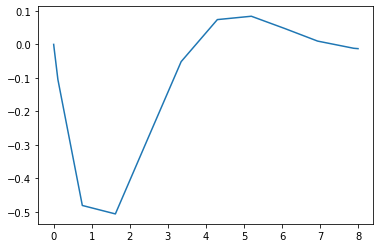

In [4]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

result = solve_ivp(f, [0, 8], [0, -1])

plt.plot(result.t, result.y[0], label='x')

As you can see, this look a little chunky. This is because solve_ivp only evaluates the points, where the solver calculates the needed steps size, if nothing more is specified. We have to specify the points, where we want to evaluate the solution. This can be done by using the `t_eval` argument.

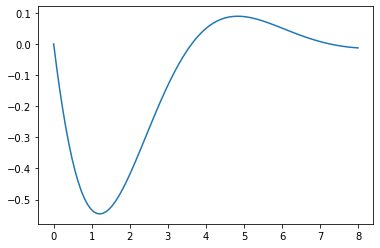

In [56]:
import numpy as np

t = np.linspace(0, 8, 100)

result = solve_ivp(f, [0, 8], [0, -1], t_eval=t)

plt.plot(result.t, result.y[0], label='x')

Let us promote another way to set up $f(t,y)$ and implement solve_ivp.

We already computed
$$
f(t,y) = 
\left(\begin{array}{cc} 
\theta(t) \\
- \theta(t) - x(t)
\end{array}\right)
$$

this can be rewritten as a matrix vector multiplication
$$
f(t,y) = 
\left(\begin{array}{cc} 
0 & 1 \\
-1 & -1
\end{array}\right)
*
\left(\begin{array}{c}
x(t) \\
\theta(t)
\end{array}\right)
$$
With this, we can simplify the implementation of $f(t,y)$ to

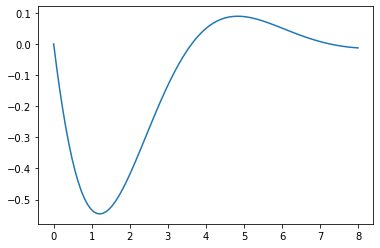

In [55]:
A = np.array([[0, 1], [-1, -1]])

def f(t, y):
    return A.dot(y)

t = np.linspace(0, 8, 100)

result = solve_ivp(f, [0, 8], [0, -1], t_eval=t)

plt.plot(result.t, result.y[0], label='x')

# Exercise 2

We want to solve the mathematical pendulum without using the $sin(x) \approx x$ approximation.

\begin{align*}
\frac{d\theta(t)^2}{d^2t} &= - \frac{g}{l} * \sin(\theta(t))
\end{align*}

First, we want to absorb $g/l$ into the time, by defining $\tilde{t} = t \sqrt{g/l}$. Verify to yourself, that this results to

\begin{align*}
\frac{d\theta(\tilde{t})^2}{d^2\tilde{t}} &= - \sin(\theta(\tilde{t}))
\end{align*}

We have just made the differential equation dimensionless. Notice, that a change of $g$ or $l$ will result in a change of the time scale. 

1. Solve the dimensionless differential equation for $\theta(0) = \pi/4$ and $\dot{\theta}(0) = 0$. And plot your results. 
2. Calculate the period of the pendulum for $\phi \in [\pi/4, \pi/2]$. Here you can be creative for finding the period. And plot your results. 
3. Verify that $\theta(0) \rightarrow 0$, $T \rightarrow 2\pi \sqrt{l/g}$.

## Coupled differential equations

As a last example for Runge-Kutta, we want to solve the coupled differential equation. Let's imagine two frictionless point masses, connected by a spring which is relax at distance $d$. This system can be described by the following differential equation:

\begin{align*}
\frac{d^2x_1}{dt^2} + \omega^2 (x_1 - x_2 - d) &= 0 \\
\frac{d^2x_2}{dt^2} + \omega^2 (x_2 - x_1 + d) &= 0
\end{align*}

We write these two second order differential equations as 4 first order differential equations by defining $\theta_1 = x'_1$ and $\theta_2 = x'_2$:
\begin{align*}
x_1'(t) &= \theta_1(t) \\
x_2'(t) &= \theta_2(t) \\
\theta_1'(t) &= - \omega^2 (x_1 - x_2 - d) \\
\theta_2'(t) &= - \omega^2 (x_2 - x_1 + d)
\end{align*}

So we get for $f(t,y)$ and $y(t)$:
$$
y(t) = 
\left(\begin{array}{cc} 
x_1(t) \\ 
x_2(t) \\
\theta_1(t) \\
\theta_2(t)
\end{array}\right)
$$ 

and
$$
f(t,y) = 
\left(\begin{array}{cc} 
\theta_1(t) \\
\theta_2(t) \\
- \omega^2 (x_1(t) - x_2(t) - d) \\
- \omega^2 (x_2(t) - x_1(t) + d)
\end{array}\right)
$$

# Exercise 3
Solve the couple differential equations for $\omega = 1$, $d = 1$, $x_1(0) = d/2$, $x_2(0) = -d/2$, $x'_1(0) = 1$ and $x'_2(0) = 0$. Plot your results.


In [7]:
# your solution goes in here